In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import matplotlib.colors as mcolors

# 1. Fine-tuning

In [7]:
test_accuracies = [0.9030, 0.9274, 0.9331, 0.9292, 0.9301, 0.9397, 0.9414, 0.9366, 0.9392, 0.9441, 0.9406, 0.9379, 0.9432, 0.9353, 0.9458, 0.9392]
names = ["0", "4", "8", "12", "16", "20", "24", "28","32", "36", "40", "44", "48", "52", "56", "58"]

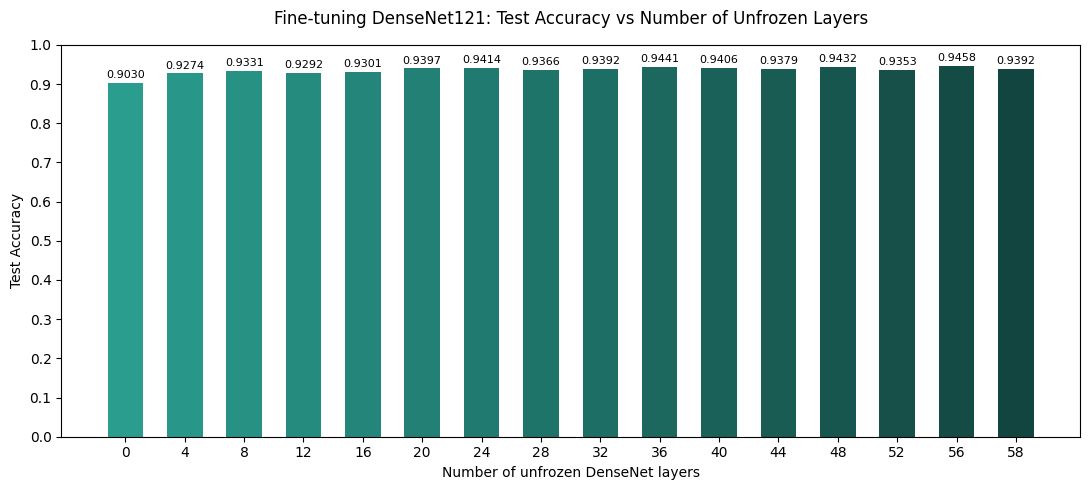

In [14]:
# colors = plt.cm.GnBu(np.linspace(0.3, 0.9, len(test_accuracies)))
base_color = "#2a9d8f"
rgb = np.array(mcolors.to_rgb(base_color))
colors = [rgb * (1.0 - 0.6*i/len(test_accuracies)) for i in range(len(test_accuracies))]

plt.figure(figsize=(11,5))

bars = plt.bar(
    names,
    test_accuracies,
    color=colors,
    width=0.6  
)

plt.bar_label(bars, fmt='%.4f', padding=2, fontsize=8)  

plt.ylabel("Test Accuracy")
plt.xlabel("Number of unfrozen DenseNet layers")
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title("Fine-tuning DenseNet121: Test Accuracy vs Number of Unfrozen Layers", pad=15)

plt.tight_layout()
plt.show()

# 2. New models


In [16]:
df = pd.read_csv("wandb_export_2026-01-09T22_57_19.140+01_00.csv")
df.head()

,Step,Squeeze-and-Excitation Unfreezed WDA - test_accuracy,Squeeze-and-Excitation Unfreezed WDA - test_accuracy__MIN,Squeeze-and-Excitation Unfreezed WDA - test_accuracy__MAX,Squeeze-and-Excitation Unfreezed - test_accuracy,Squeeze-and-Excitation Unfreezed - test_accuracy__MIN,Squeeze-and-Excitation Unfreezed - test_accuracy__MAX,Add-New-Block Unfreezed WDA - test_accuracy,Add-New-Block Unfreezed WDA - test_accuracy__MIN,Add-New-Block Unfreezed WDA - test_accuracy__MAX,...,Remove-1-Block Unfreezed WDA - test_accuracy__MAX,Add-New-Block Unfreezed - test_accuracy,Add-New-Block Unfreezed - test_accuracy__MIN,Add-New-Block Unfreezed - test_accuracy__MAX,Remove-2-Blocks Unfreezed - test_accuracy,Remove-2-Blocks Unfreezed - test_accuracy__MIN,Remove-2-Blocks Unfreezed - test_accuracy__MAX,Remove-1-Block Unfreezed - test_accuracy,Remove-1-Block Unfreezed - test_accuracy__MIN,Remove-1-Block Unfreezed - test_accuracy__MAX
0,0,0.210227,0.210227,0.210227,0.195367,0.195367,0.195367,0.673077,0.673077,0.673077,...,0.238636,0.543706,0.543706,0.543706,0.158217,0.158217,0.158217,0.328671,0.328671,0.328671
1,1,0.717657,0.717657,0.717657,0.683566,0.683566,0.683566,0.867570,0.867570,0.867570,...,0.630245,0.868881,0.868881,0.868881,0.315122,0.315122,0.315122,0.719843,0.719843,0.719843
2,2,0.865385,0.865385,0.865385,0.885927,0.885927,0.885927,0.902098,0.902098,0.902098,...,0.692745,0.917832,0.917832,0.917832,0.498252,0.498252,0.498252,0.824738,0.824738,0.824738
3,3,0.915210,0.915210,0.915210,0.920455,0.920455,0.920455,0.916958,0.916958,0.916958,...,0.763112,0.940997,0.940997,0.940997,0.592657,0.592657,0.592657,0.840035,0.840035,0.840035
4,4,0.929633,0.929633,0.929633,0.934878,0.934878,0.934878,0.925699,0.925699,0.925699,...,0.857955,0.944493,0.944493,0.944493,0.627185,0.627185,0.627185,0.883304,0.883304,0.883304


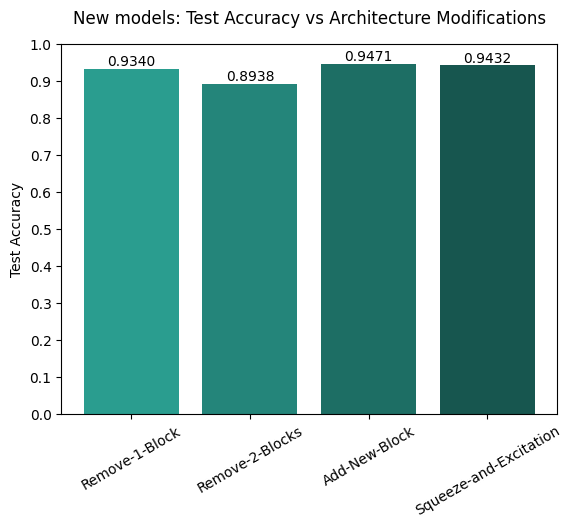

In [19]:
names = ["Remove-1-Block", "Remove-2-Blocks", "Add-New-Block", "Squeeze-and-Excitation"]
accuracies = []

for name in names:
    accuracies.append(df[name + " Unfreezed - test_accuracy"].max())
    
base_color = "#2a9d8f"
rgb = np.array(mcolors.to_rgb(base_color))
colors = [rgb * (1.0 - 0.6*i/len(accuracies)) for i in range(len(accuracies))]
    
bars = plt.bar(names, accuracies, color=colors)
plt.bar_label(bars, fmt='%.4f', padding=0)
plt.ylabel("Test Accuracy")
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xticks(rotation=30)
plt.title("New models: Test Accuracy vs Architecture Modifications", pad=15)
plt.show()

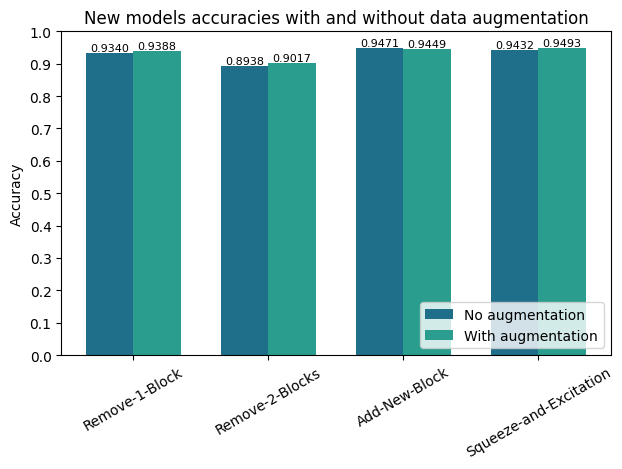

In [ ]:
names = ["Remove-1-Block", "Remove-2-Blocks", "Add-New-Block", "Squeeze-and-Excitation"]
accuracies_no_WDA = []
accuracies_WDA = []

for name in names:
    accuracies_no_WDA.append(df[name + " Unfreezed - test_accuracy"].max())
    accuracies_WDA.append(df[name + " Unfreezed WDA - test_accuracy"].max())
    
    
x = np.arange(len(names))   # label locations
width = 0.35                 # width of the bars

plt.figure()
bars1 = plt.bar(x - width/2, accuracies_no_WDA, width, label="No augmentation", color="#1f6f8b")
bars2= plt.bar(x + width/2, accuracies_WDA, width, label="With augmentation", color="#2a9d8f")
plt.bar_label(bars1, fmt='%.4f', padding=0, fontsize=8)
plt.bar_label(bars2, fmt='%.4f', padding=0, fontsize=8)

# plt.xlabel("Model")
plt.xticks(rotation=30)
plt.ylabel("Test Accuracy")
plt.title("New models: with and without data augmentation")
plt.xticks(x, names)
plt.legend(loc="lower right")

plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

plt.tight_layout()
plt.show()